## Churn Analysis

### Business Understanding

#### Problem Statement
Telsat, as a telecommunications company, encounters both prospects and obstacles as it looks ahead. Presently, the management is keen on assessing the company's status, including crucial metrics such as the churn rate, which signifies the proportion of customers discontinuing the use of Telsat's services. All of this evaluation is imperative in light of the intensifying competition from numerous rivals in the telecommunications industry.

#### Goals
Identifying the causes and assessing the level of churn rate involves a comprehensive analysis of various factors. Examining customer demographics and behavior patterns may reveal trends associated with churn

In [1]:
import pandas as pd
import numpy as np

#### Data Understanding

In [2]:
df = pd.read_csv("telcochurndatacsv.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- TotalCharges should be float

In [5]:
# ValueError: could not convert string to float: ' '

In [6]:
df[(df["TotalCharges"] == " ")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
# change datatype TotalCharges
# change "" to "0"

df["TotalCharges"] = df["TotalCharges"].replace(" ", 0).astype("float64") 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- There's no missing value

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df[df.loc[:,"tenure"] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


- value min in tenure = 0 is a new customer, so the TotalCharges is also 0

In [12]:
np.object = object

In [13]:
df.describe(include = np.object).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

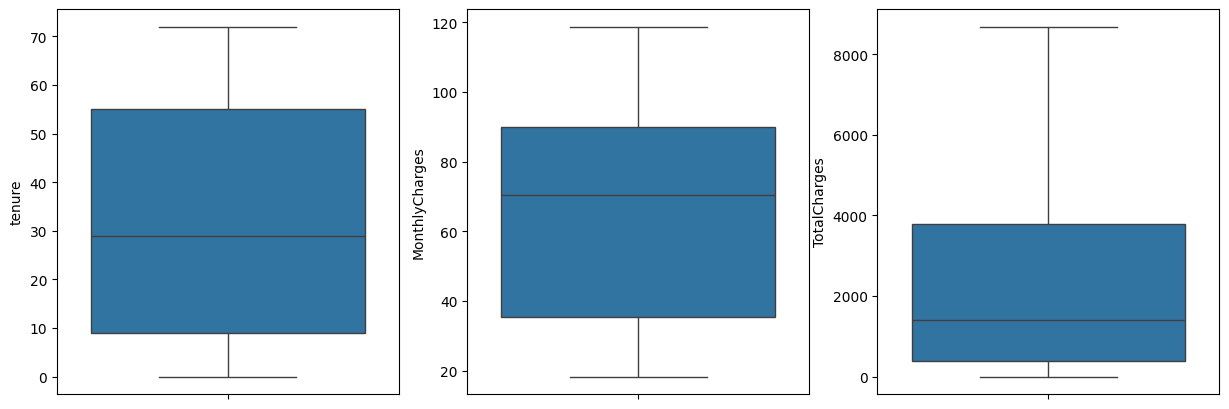

In [15]:
# cek data outliers

col_outliers = ["tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize = (15,5))
for i in range(0, len(col_outliers)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y = df[col_outliers[i]])
plt.show()

- no data outliers

In [16]:
# cek duplicated

df[df.duplicated()] 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


- no duplicated data

### Analysis

In [17]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [18]:
churn_pr = df["Churn"].value_counts(normalize = True)*100
churn_pr

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

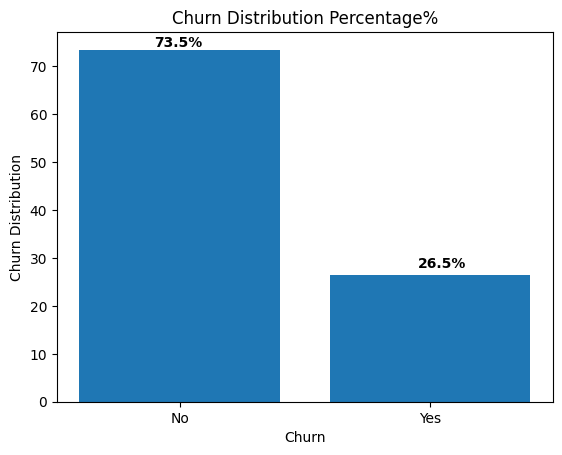

In [19]:
xo = churn_pr.index
yo = churn_pr.values
plt.bar(xo, yo)
plt.xlabel('Churn')
plt.ylabel('Churn Distribution') 
plt.title('Churn Distribution Percentage%')
plt.text(0.95, 28, '26.5%',fontweight='bold')
plt.text(-0.1, 74, '73.5%',fontweight='bold')
plt.show()

- There are 26.5% of customers who do not continue to subscribe (unsubscribe) to the service
- This is quite a high number because it is 1/4 of the total customers

In [20]:
Churn_Yes = df[df["Churn"] == "Yes"]
Churn_Yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [21]:
Churn_Yes["TotalCharges"].sum()

2862926.9

**The company's total lost revenue was 2862926.9**

**early vs late churn?**

In [22]:
Churn_Yes.groupby("Churn")["tenure"].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


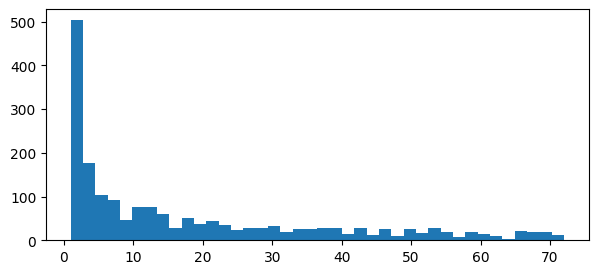

In [23]:
plt.figure(figsize=(7,3))
plt.hist(Churn_Yes["tenure"],
        bins = 40)
plt.show()

In [24]:
Churn_Yes[(Churn_Yes["tenure"] < 3)].head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes


**Many customers unsubscribe, in the early months they start subscribing.**

#### Demographic

In [25]:
#gender

df["gender"].value_counts(normalize = True)*100

gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64

In [26]:
gender_Yes = Churn_Yes["gender"].value_counts(normalize = True)*100
gender_Yes

gender
Female    50.24077
Male      49.75923
Name: proportion, dtype: float64

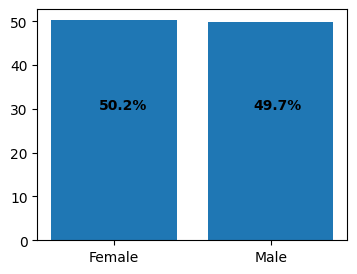

In [27]:
xg = gender_Yes.index
yg = gender_Yes.values
plt.figure(figsize=(4,3)) 
plt.bar(xg, yg)
plt.text(-0.1, 30, '50.2%',fontweight='bold')
plt.text(0.89, 30, '49.7%',fontweight='bold')
plt.show()

- There is not much difference between male and female who unsubscribe

In [28]:
# SeniorCitizen

df["SeniorCitizen"].value_counts(normalize = True)*100

SeniorCitizen
0    83.785319
1    16.214681
Name: proportion, dtype: float64

In [29]:
(pd.crosstab(index= df["Churn"], columns=df["SeniorCitizen"], normalize= "columns") *100).round(2)

SeniorCitizen,0,1
Churn,,
No,76.39,58.32
Yes,23.61,41.68


- The number of seniorcitizen (1) customers is only 16%, but their churn rate is 48% compared to 23% for non-seniorcitizens (0).

In [30]:
# partner

df["Partner"].value_counts(normalize = True)*100

Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64

In [31]:
(pd.crosstab(index= df["Churn"], columns=df["Partner"], normalize= "columns") *100).round(2)

Partner,No,Yes
Churn,,
No,67.04,80.34
Yes,32.96,19.66


In [32]:
partner_Yes = Churn_Yes["Partner"].value_counts(normalize = True)*100
partner_Yes

Partner
No     64.205457
Yes    35.794543
Name: proportion, dtype: float64

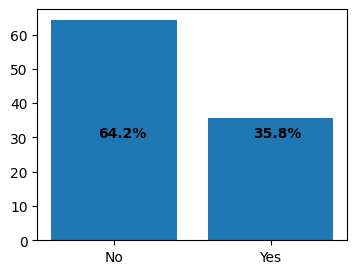

In [33]:
xg = partner_Yes.index
yg = partner_Yes.values
plt.figure(figsize=(4,3)) 
plt.bar(xg, yg)
plt.text(-0.1, 30, '64.2%',fontweight='bold')
plt.text(0.89, 30, '35.8%',fontweight='bold')
plt.show()

- Customers who don't have a partner tend to choose to unsubscribe compared to those who have a partner

In [34]:
# dependents

df["Dependents"].value_counts(normalize = True)*100

Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64

In [35]:
dependent_Yes = Churn_Yes["Partner"].value_counts(normalize = True)*100
dependent_Yes

Partner
No     64.205457
Yes    35.794543
Name: proportion, dtype: float64

**Analysis by demographic**

- There is not much difference between male and female who unsubscribe, approximately 50-50.
- The number of seniorcitizen (1) customers is only 16%, but their churn rate is 48% compared to 23% for non-seniorcitizens (0).
- Customers who don't have a partner tend to choose to unsubscribe compared to those who have a partner.

#### Product

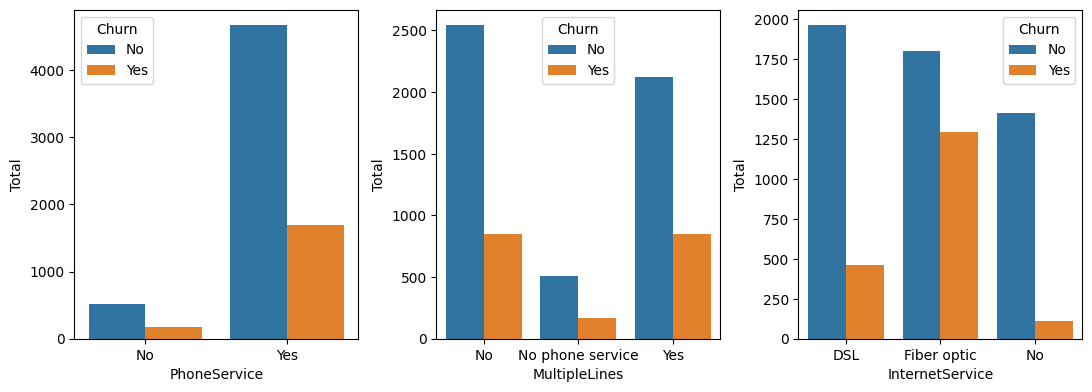

In [141]:
def product(col):
    crs = pd.crosstab(index = [df[col], df["Churn"]], columns = "Total")
    crs = crs.reset_index()
    sns.barplot(x = col, y = "Total", hue = "Churn", data = crs)

plt.figure(figsize=(11,4))    
plt.subplot(1,3,1)
product("PhoneService")

plt.subplot(1,3,2)
product("MultipleLines")

plt.subplot(1,3,3)
product("InternetService")

plt.tight_layout(pad = 1.0)
plt.show()

What's interesting is that those who subscribe to the internet service have a higher churn rate, especially on fiber optic

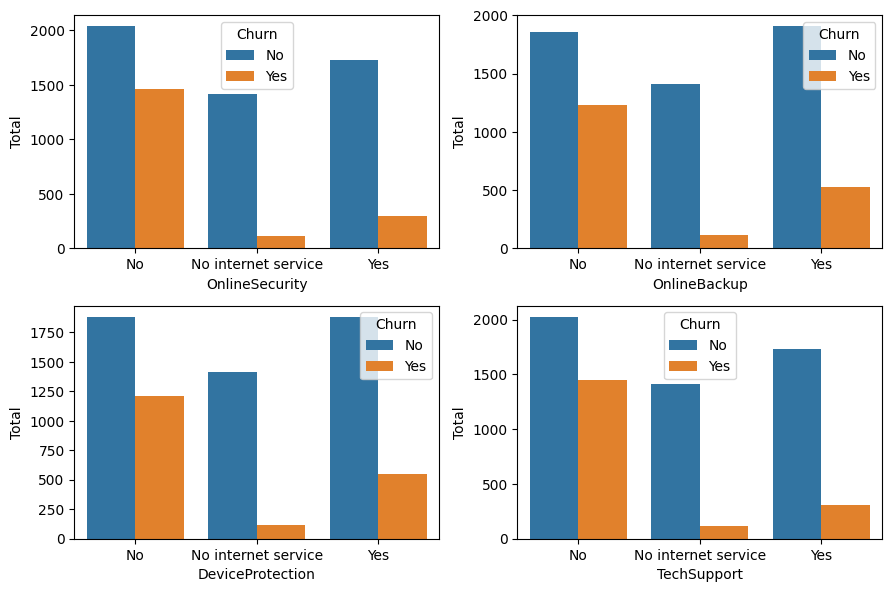

In [150]:
# support service

plt.figure(figsize=(9,6))    
plt.subplot(2,2,1)
product("OnlineSecurity")

plt.subplot(2,2,2)
product("OnlineBackup")

plt.subplot(2,2,3)
product("DeviceProtection")

plt.subplot(2,2,4)
product("TechSupport")

plt.tight_layout(pad = 1.0)
plt.show()

- Customer who do not have support services choose to unsubscribe

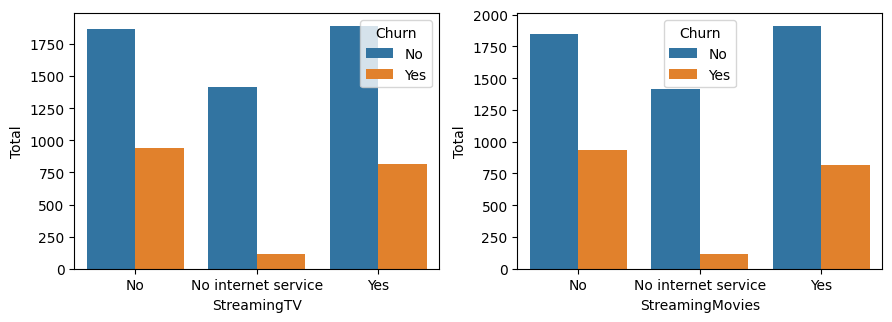

In [161]:
# streaming service

plt.figure(figsize=(9,6))    
plt.subplot(2,2,1)
product("StreamingTV")

plt.subplot(2,2,2)
product("StreamingMovies")

plt.tight_layout(pad = 1.0)
plt.show()

- Streaming services don't have much of an effect on churn rate

In [59]:
# contract

kontrak = df["Contract"].value_counts(normalize = True)*100
kontrak

Contract
Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: proportion, dtype: float64

In [60]:
kontr = pd.crosstab(index=df["Contract"], columns = df["Churn"])

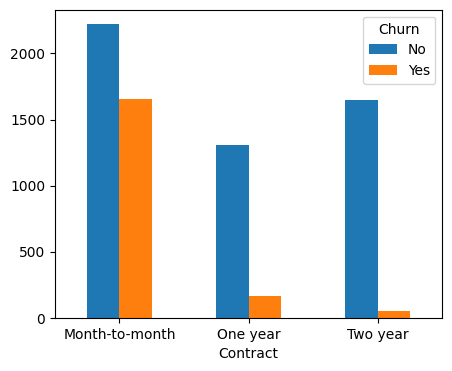

In [61]:
kontr.plot.bar(figsize=(5,4), rot = 0)
plt.show()

In [39]:
# PaymentMethod

df["PaymentMethod"].value_counts(normalize = True)*100

PaymentMethod
Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: proportion, dtype: float64

In [40]:
PM_Yes = Churn_Yes["PaymentMethod"].value_counts(normalize = True)*100
PM_Yes

PaymentMethod
Electronic check             57.303371
Mailed check                 16.479401
Bank transfer (automatic)    13.804173
Credit card (automatic)      12.413055
Name: proportion, dtype: float64

Customers with electronic check payment methods have the highest churn rate.

In [73]:
(pd.crosstab(index = [df["Contract"], df["PaymentMethod"]], 
             columns = df["Churn"],
             normalize = "index",
             margins = True)*100).round(2)

Churn                                        No    Yes
Contract       PaymentMethod                          
Month-to-month Bank transfer (automatic)  65.87  34.13
               Credit card (automatic)    67.22  32.78
               Electronic check           46.27  53.73
               Mailed check               68.42  31.58
One year       Bank transfer (automatic)  90.28   9.72
               Credit card (automatic)    89.70  10.30
               Electronic check           81.56  18.44
               Mailed check               93.18   6.82
Two year       Bank transfer (automatic)  96.63   3.37
               Credit card (automatic)    97.76   2.24
               Electronic check           92.26   7.74
               Mailed check               99.21   0.79
All                                       73.46  26.54

There is a fairly strong correlation between **month-to-month contracts** and **electronic check payment methods** which causes a high churn rate

In [163]:
# contract

bill = df["PaperlessBilling"].value_counts(normalize = True)*100
bill

PaperlessBilling
Yes    59.221922
No     40.778078
Name: proportion, dtype: float64

In [167]:
(pd.crosstab(index= df["Churn"], columns=df["PaperlessBilling"], normalize= "columns") *100).round(2)

PaperlessBilling,No,Yes
Churn,,
No,83.67,66.43
Yes,16.33,33.57


#### Conclusion

- The company's total lost revenue was 2862926.9
- Many customers unsubscribe, in the early months they start subscribing
- Those who subscribe to the internet service have a higher churn rate, especially on fiber optic
- Customer who do not have support services choose to unsubscribe
- There is a fairly strong correlation between month-to-month contracts and electronic check payment methods which causes a high churn rate

#### Recommendation

- Evaluate fiber optic internet products
- Companies also need to evaluate support services, this will influence a better customer experience
- Offering promotional discounts for longer-term contracts; the longer the term of the contract, the greater the promo price
- Provide recommendations for certain payment methods that are more seamless